In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
import generateGraphs

%matplotlib inline

In [2]:
volunteerServices = pd.read_csv("volunteer_services_anonymized.csv")

In [3]:
volunteerServices['appt_date'].max()
volunteerServices.columns

Index(['anon_ID', 'rider_first_ride_date', 'rider_last_ride_date',
       'rider_num_rides', 'appt_date', 'appt_duration', 'category'],
      dtype='object')

In [4]:
volunteerServices['rider_first_ride_date'] = pd.to_datetime(volunteerServices['rider_first_ride_date'])
volunteerServices['rider_last_ride_date'] = pd.to_datetime(volunteerServices['rider_last_ride_date'])
volunteerServices['appt_date'] = pd.to_datetime(volunteerServices['appt_date'])

In [5]:
#volunteerServices['rider_num_rides'].describe()
#no rider number of rides???
#volunteerServices.groupby('category').count()

#group pantry and pantry delivery?

In [6]:
"""volunteerServices['Quarter_FY'] = volunteerServices['appt_date'].dt.quarter
volunteerServices['FY'] = volunteerServices['appt_date'].dt.year
volunteerServices['month'] = volunteerServices['appt_date'].dt.month
groupByFYQuarter = volunteerServices.groupby(['FY','Quarter_FY']).count()['anon_ID']
groupByFYMonth = volunteerServices.groupby(['FY','month']).count()['appt_date']"""

"volunteerServices['Quarter_FY'] = volunteerServices['appt_date'].dt.quarter\nvolunteerServices['FY'] = volunteerServices['appt_date'].dt.year\nvolunteerServices['month'] = volunteerServices['appt_date'].dt.month\ngroupByFYQuarter = volunteerServices.groupby(['FY','Quarter_FY']).count()['anon_ID']\ngroupByFYMonth = volunteerServices.groupby(['FY','month']).count()['appt_date']"

In [7]:
volunteerServices['category'].value_counts()

Doctor Appt               2102
Shopping                  1158
Board or Committee Mtg     586
Friendly Visit             571
Pantry                     273
Errands                     79
Special Projects            56
Odd Jobs                    43
Pantry Delivery             30
Skilled Work                20
Yard Work                    4
Telephone Reassurance        3
Name: category, dtype: int64

In [8]:
#remove Telephone reassurance, not enough datapoints
volunteerServices = volunteerServices[volunteerServices['category'] != "Telephone Reassurance"]

#combine odd jobs, yard work, and skilled work
volunteerServices['category'] = volunteerServices['category'].where(volunteerServices['category']!="Yard Work", "Odd Jobs")
volunteerServices['category'] = volunteerServices['category'].where(volunteerServices['category']!="Skilled Work", "Odd Jobs")

#combine pantry and pantry delivery
volunteerServices['category'] = volunteerServices['category'].where(volunteerServices['category']!="Pantry Delivery", "Pantry")

volunteerServices['category'].value_counts()

Doctor Appt               2102
Shopping                  1158
Board or Committee Mtg     586
Friendly Visit             571
Pantry                     303
Errands                     79
Odd Jobs                    67
Special Projects            56
Name: category, dtype: int64

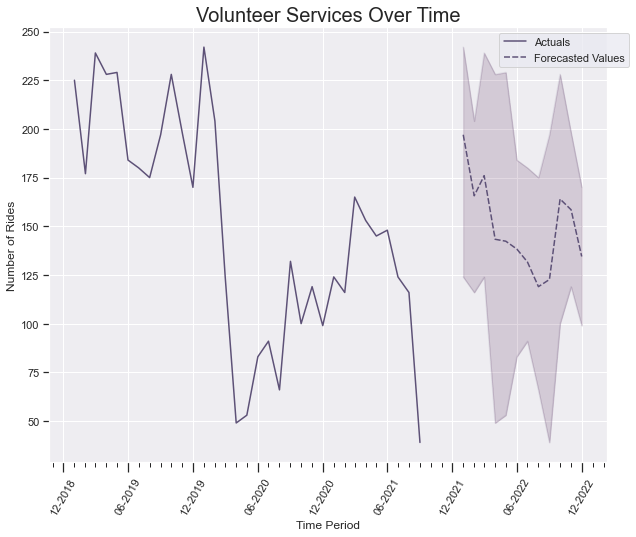

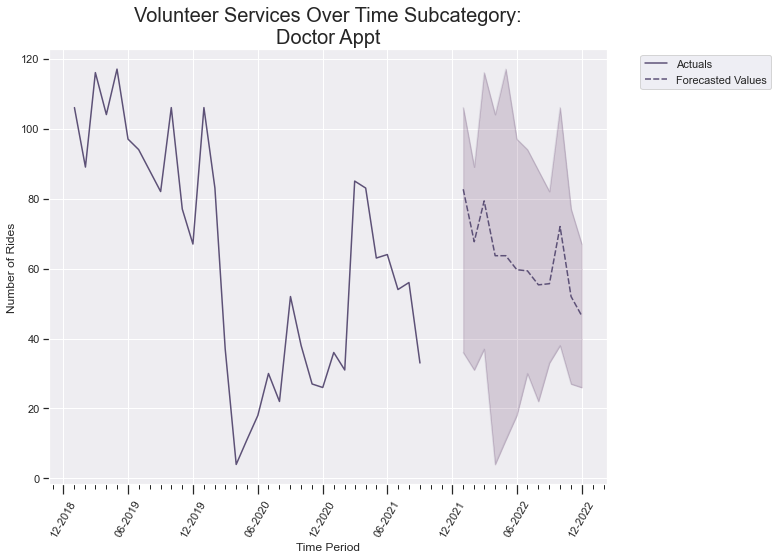

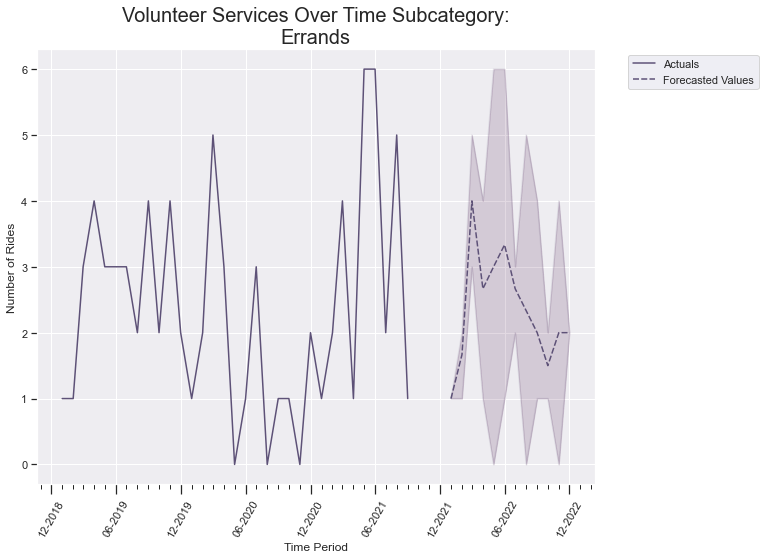

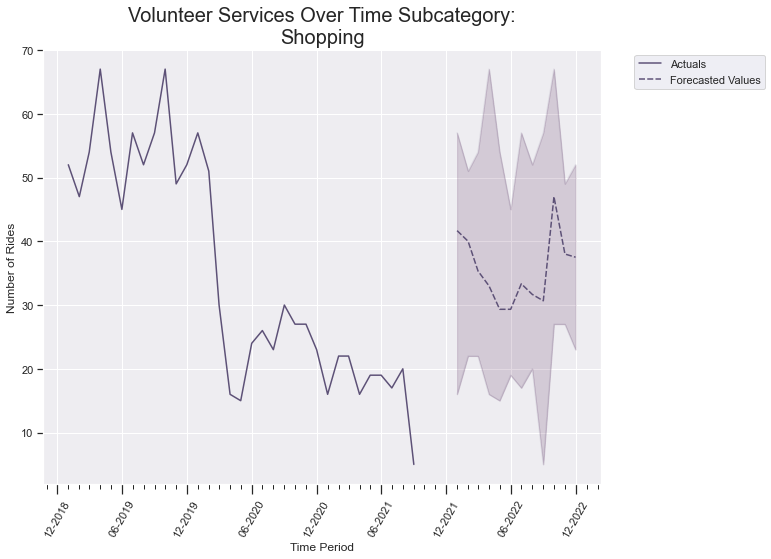

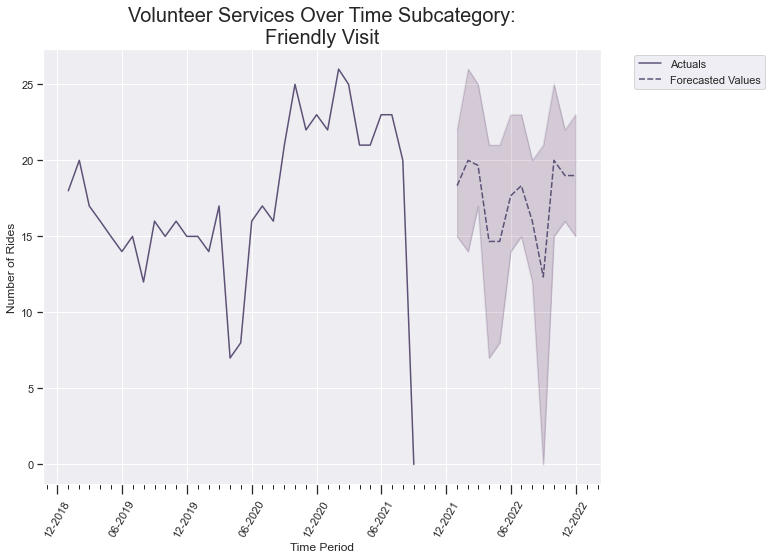

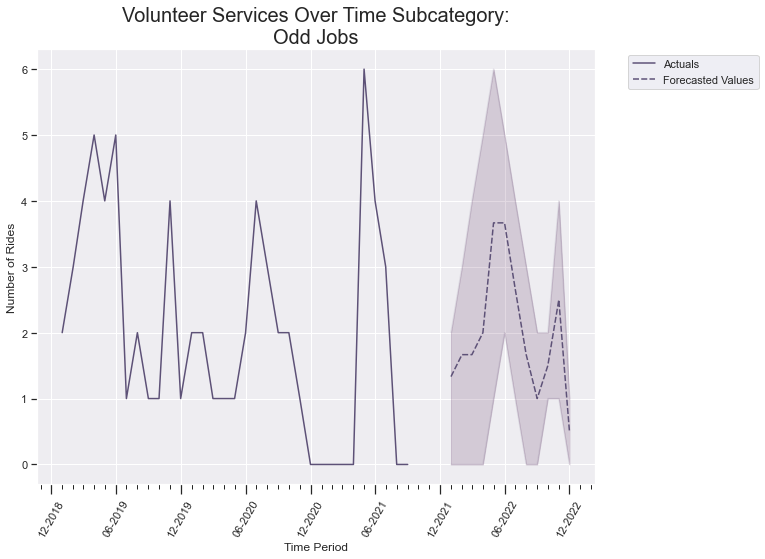

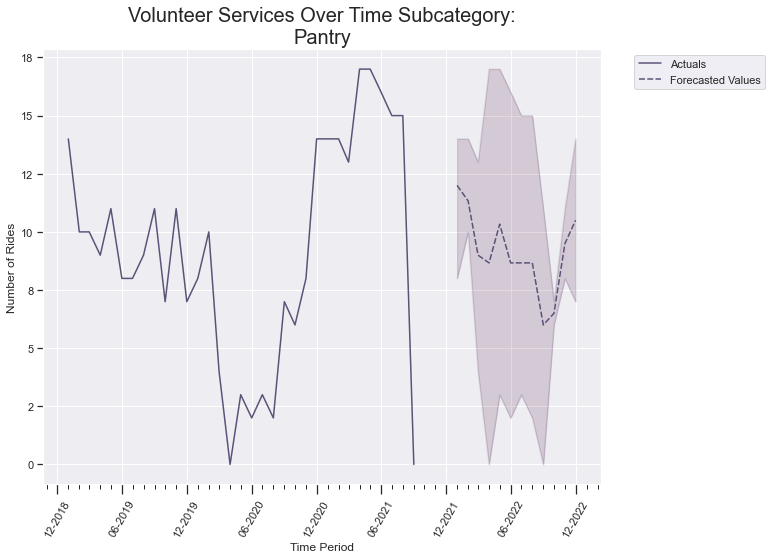

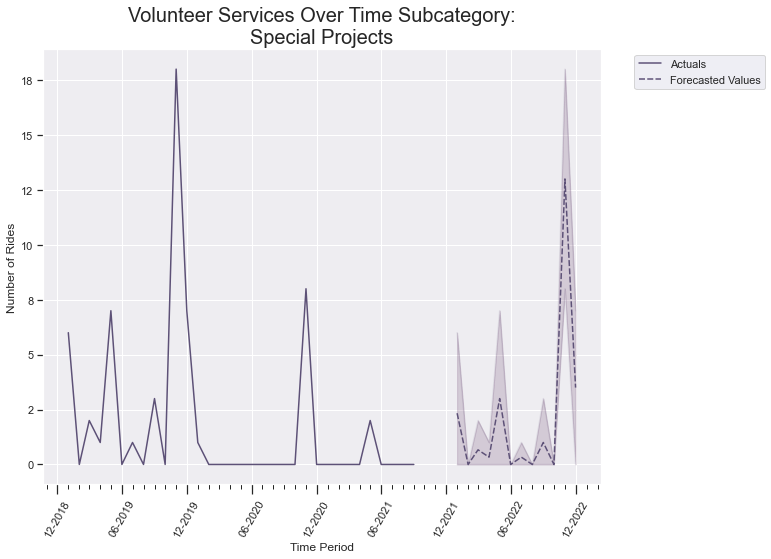

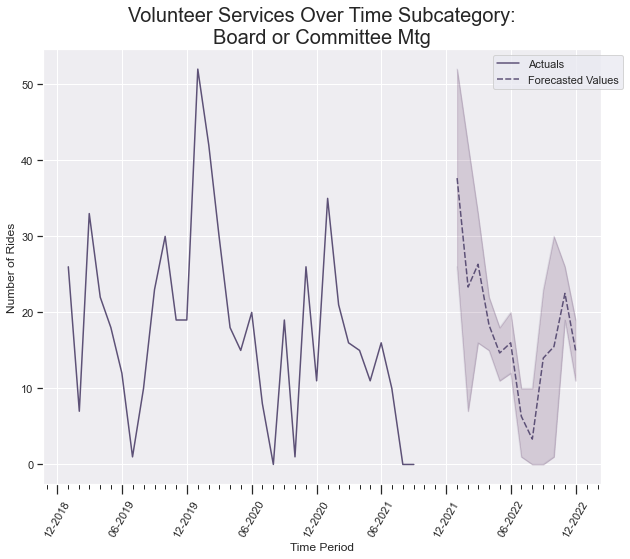

In [9]:
listOfCategories = volunteerServices['category'].unique()
#generateGraphs.generateGraphSet(volunteerServices, 'appt_date', 'category', listOfCategories, 'rider_first_ride_date', 'Amount','No')

generateGraphs.generateGraphSet(dataFrameNameForTitle = 'Volunteer Services', df = volunteerServices, dateColumn='appt_date',specialColumnForCategory ='category', 
                                listOfCategories= listOfCategories, columnForAnalysis='appt_date', 
                                yAxisNameForGraph= 'Number of Rides', isDollars='No')